<a href="https://colab.research.google.com/github/Siri2191/study_area/blob/main/Mobile_price_prediction_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Contacts: </h1>


Linkedin: https://www.linkedin.com/in/guilherme-irigon-22a1a458/

github: https://github.com/Siri2191

instagram: @guilhermeirigon



<h1>Contexto</h1>

Bob começou sua própria empresa móvel. Ele quer dar uma dura luta para grandes empresas como Apple, Samsung etc.

Ele não sabe como estimar o preço dos celulares que sua empresa cria. Neste competitivo mercado de telefonia móvel, você não pode simplesmente assumir as coisas. Para resolver esse problema ele coleta dados de vendas de celulares de várias empresas.

Bob quer descobrir alguma relação entre recursos de um celular (por exemplo: RAM, Memória Interna etc) e seu preço de venda. Mas ele não é tão bom em Machine Learning. Então ele precisa da sua ajuda para resolver este problema.

Neste problema você não tem que prever o preço real, mas uma faixa de preço indicando o quão alto o preço é


<h1> Descrição das Variaveis</h1>

battery_power = capacidade da bateria (mAh) [Quantitativa continua]

blue = tem bluetooth (0 = não/1 = sim) [Binária]

clock_speed = velocidade com que o micro processador executa uma tarefa [Quantitativa continua]

dual_sim = Se possui dois chip's (0 = não/1 = sim) [Binária]

fc = definição da camera frontal (MegaPixel) [Quantitativa continua]

four_g = Se possui 4G (0 = não/1 = sim) [Binária]

int_memory = memoria interna [Quantitavica continua]

m_dep = Profunidade do aparelho em cm [Quantitativa continua]

mobile_wt = peso do apaelho [Quantitativa continua]

n_cores = numero de nucleos do processador [Quantitativa discreta]

pc = definição da camera primaria (MegaPixel) [Quantitativa continua]

px_heigth = altura da resolução de pixel [Quantitativa continua]

px_widht = largura da resolução de pixel [Quantitativa continua]

ram = Memôria de acesso [Quantitativa continua]

sc_h = Altura da tela [Quantitativa continua]

sc_w = largura da tela [Quantitativa continua]

talk_time = tempo de duração de uma carga [Quantitativa continua]

three_g = se tem 3G (0 = não/1 = sim) [Binária]

touch_screen = se tem touch (0 = não/1 = sim) [Binária]

wifi = se tem wifi (0 = não/1 = sim) [Binária]

price_range = preço 

# Bibliotecas Utilizadas

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


<h1>Analise Primaria dos Dados</h1>

In [ ]:

df_train = pd.read_csv('train.csv')
df_train 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<h1>Analisando Correlação entre as variaveis</h1>

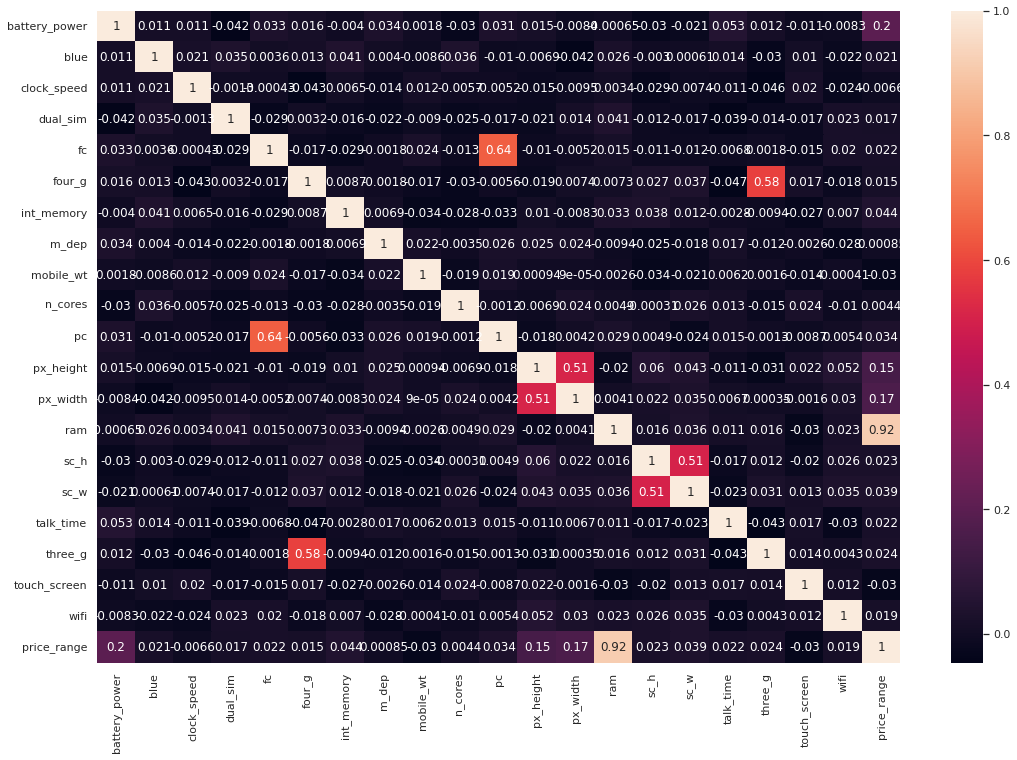

In [ ]:
sns.set(rc = {'figure.figsize':(18,12)})
ax = sns.heatmap(df_train.corr(), annot=True)

<h1>Observação:</h1>

Aparentemente existe uma correlação alta entre a Ram e o preço do aparelho. Além disso também existe uma correlação significativa entre: sc_h (altura da tela) e sc_w (largura de tela), px_height(Definição na horizontal) e px_width(definição na vertical), three_g e four_g.  

O que vale uma analise mais cuidadosa.



<h1> Anaisando Comportamento de Preço e RAM</h1>


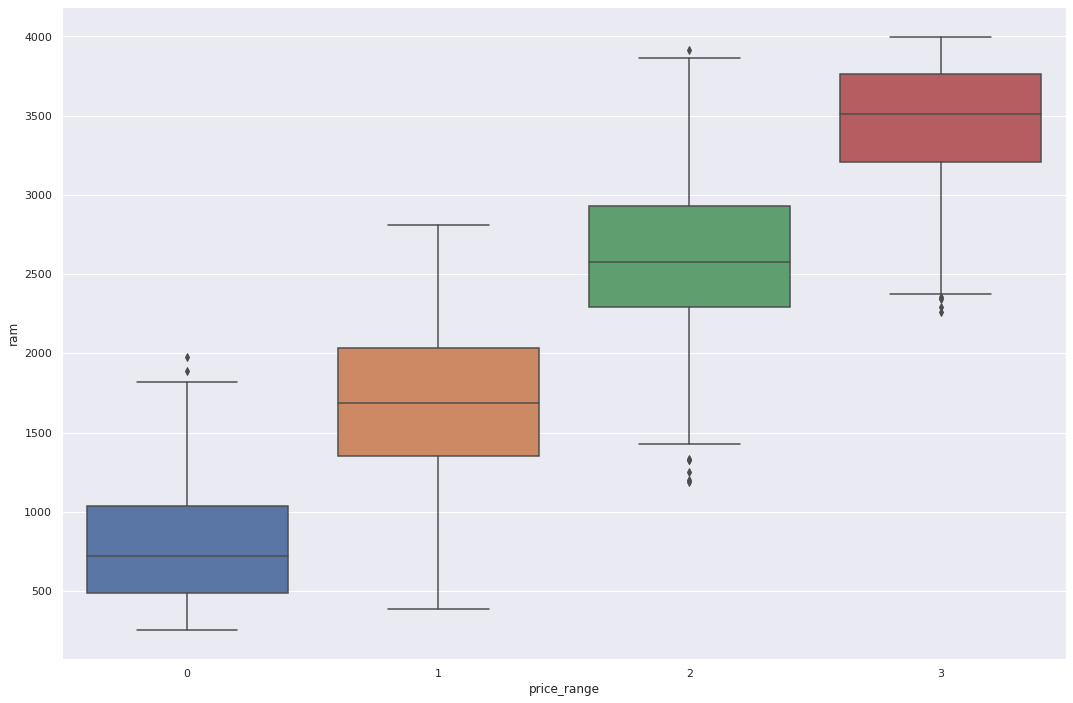

In [ ]:
ax = sns.boxplot(x='price_range',y='ram', data = df_train)
ax

<h1>Observação:</h1> 

* Quanto maior a ram, a classificação de preço tende ser maior. 




<h1>Analisando as Variaveis 3G e 4G</h1> 

In [ ]:
df_train.groupby('three_g')['three_g'].count()

three_g
0     477
1    1523
Name: three_g, dtype: int64

In [ ]:
df_train.groupby('four_g')['four_g'].count()

four_g
0     957
1    1043
Name: four_g, dtype: int64

In [ ]:
pct_4g = df_train.groupby('four_g')['four_g'].count()[1]/len(df_train)*100
pct_3g = df_train.groupby('three_g')['three_g'].count()[1]/len(df_train)*100
pct_3g_e_4g =len(df_train.query('three_g==1 and four_g==1'))/len(df_train)*100
pct_sg = len(df_train.query('three_g==0 and four_g==0'))/len(df_train)*100

print('Porcentagem com 4G : {:.2f} %'.format(pct_4g))  
print('Porcentagem com 3G : {:.2f} %'.format(pct_3g))  
print('Porcentagem com 4G e 3G : {:.2f} %'.format(pct_3g_e_4g))
print('Porcentagem sem 4G e sem 3G : {:.2f} %'.format(pct_sg))

Porcentagem com 4G : 52.15 %
Porcentagem com 3G : 76.15 %
Porcentagem com 4G e 3G : 52.15 %
Porcentagem sem 4G e sem 3G : 23.85 %


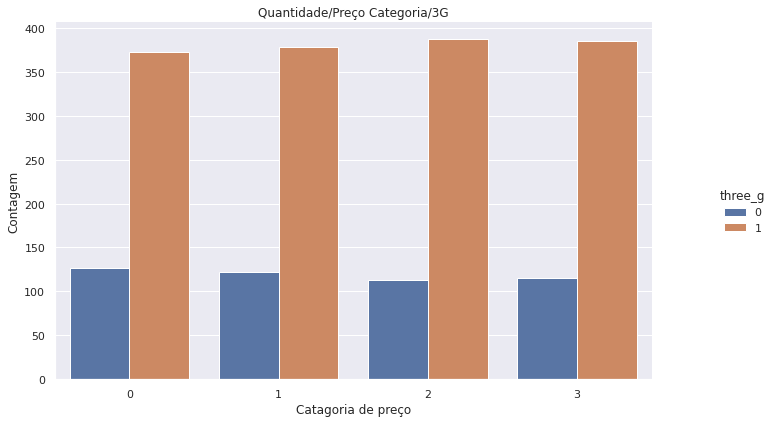

In [ ]:

ax = sns.catplot(x='price_range', data=df_train, hue='three_g',kind='count')
ax.figure.set_size_inches(12,6) 
ax.set(title ='Quantidade/Preço Categoria/3G', xlabel='Catagoria de preço',ylabel='Contagem') 
ax

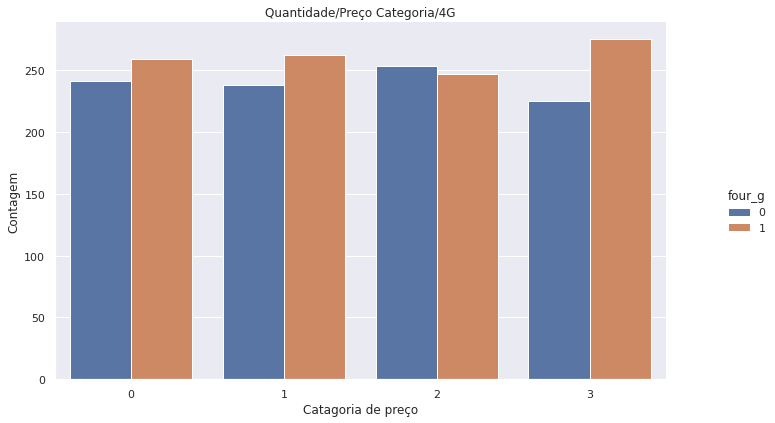

In [ ]:
ax = sns.catplot(x='price_range', data=df_train, hue='four_g',kind='count')
ax.figure.set_size_inches(12,6) 
ax.set(title ='Quantidade/Preço Categoria/4G', xlabel='Catagoria de preço',ylabel='Contagem') 
ax

<h1> Observações:</h1>

* Todos os celulares que possuem 4G possuem 3G também e representam 52,15% do total de celulares. Isso explica a significativa correlção entre esas varieaves.

* tem um total de 477 celulares que não tem 4G nem 3G. Isso representa 23,85% do total.

* O fato de possuir ou não 4G/3G não interfere na classificação do preço.

<h1>Analisando o tamanho da tela</h1>

Existe uma correlação significativa entre sc_h (altura da tela em centimetros) e sc_w (largura de tela em centimetros). Para que esta correlação não atrapalhe o modelo de classificação, vou criar uma nova variavel sc_a (area de tela em cm²), retirar as colunas sc_h e sc_w e depois observar seu comportamento em  relação a categoria de preço.

In [ ]:
df_train['sc_a'] = df_train['sc_h']*df_train['sc_w']
df_train.drop(columns=['sc_h','sc_w'],inplace=True)
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_a
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,19,0,0,1,1,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,7,1,1,0,2,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,9,1,1,0,2,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,11,1,0,0,2,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,15,1,1,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,19,1,1,0,0,52
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,16,1,1,1,2,110
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,5,1,1,0,3,9
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,19,1,1,1,0,180


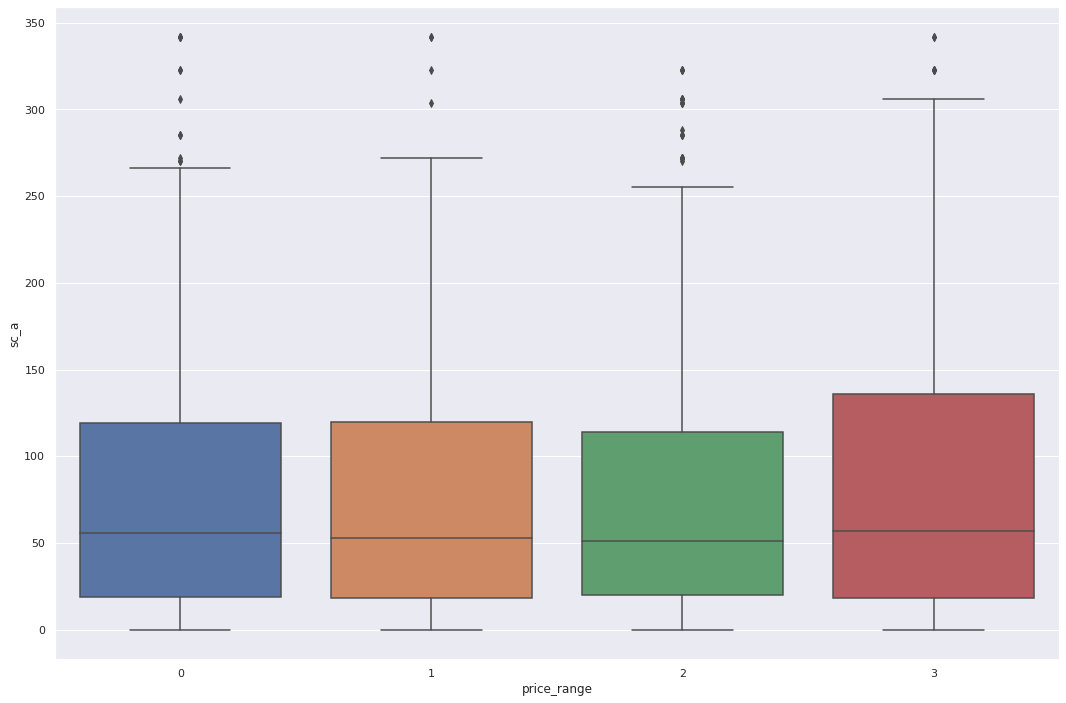

In [ ]:
ax = sns.boxplot(x='price_range',y='sc_a', data = df_train)
ax

<h1>Observação:</h1>

* Aparentemente o tamanho da tela não interfere muito na classificação do preço. Como já se podia ver na correlação anterior

<h1>Analisando a Definição de Tela do Celular</h1> 

as variaveis px_height(Definição na horizontal em MegaPixel) e px_width(definição na vertical em MegaPixel) apresentam uma correlação sgnificativa. Para que isso não atrapalhe a criação do modelo, irei criar uma variavem px_a que representaria a definição do aparalhe por unidade de area, no caso, MEGAPIXEL² e em seguida irei retirar as variaveis e analisar o comportamento da variavel criada em relação a categoria de preço

In [ ]:
df_train['px_a'] = df_train['px_width']*df_train['px_height']
df_train.drop(columns=['px_width','px_height'],inplace=True)
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_a,px_a
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,63,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,51,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,22,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,128,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,16,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,19,1,1,0,0,52,2309580
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,16,1,1,1,2,110,1797975
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,5,1,1,0,3,9,1416576
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,19,1,1,1,0,180,225120


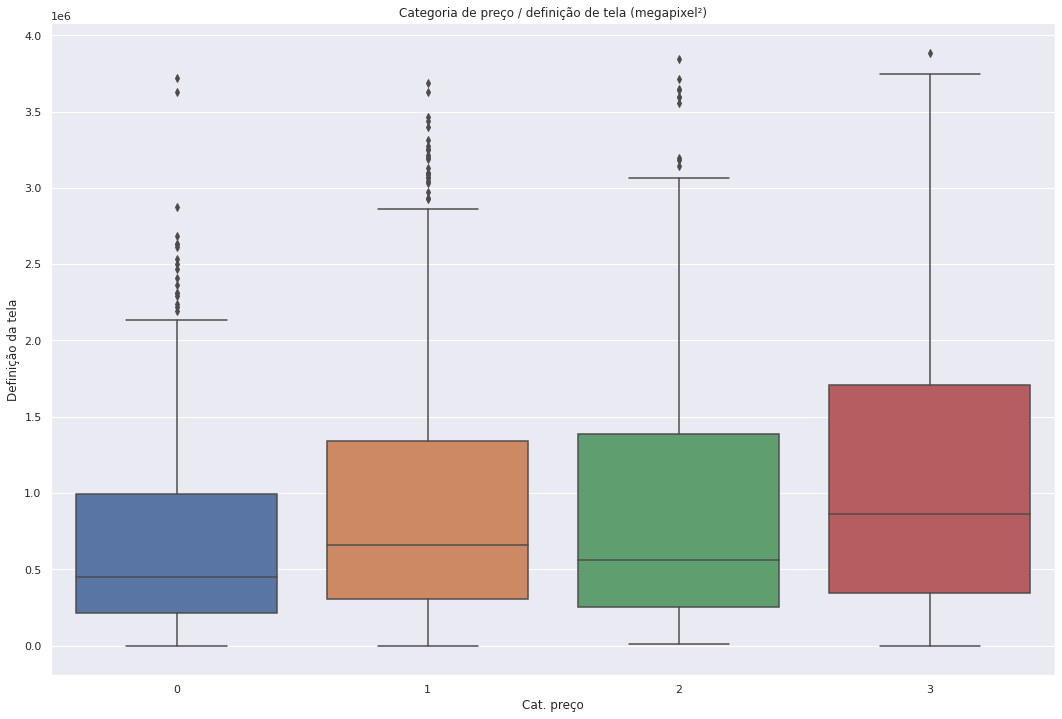

In [ ]:
ax = sns.boxplot(x='price_range',y='px_a', data = df_train)
ax.set(title ='Categoria de preço / definição de tela (megapixel²)', ylabel='Definição da tela',xlabel='Cat. preço') 
ax


<h1>Observação:</h1>

* Os celulares de categoria de preço 3 aparetam possuir mais definição do que os de outras categorias. 



<h1>Analise Das Camêras</h1>



In [ ]:
pct_pc = df_train.query('pc != 0 and fc==0')['price_range'].count()/len(df_train)*100
pct_fc = df_train.query('fc != 0 and pc==0')['price_range'].count()/len(df_train)*100
pct_pc_e_fc = df_train.query('pc!=0 and fc!=0')['price_range'].count()/len(df_train)*100
pct_semcamera = df_train.query('pc==0 and fc==0')['price_range'].count()/len(df_train)*100

print('{:.2f} %  dos celulares apresentam só uma camêra frontal'.format(pct_fc))  
print('{:.2f} %  dos celulares apresentam só uma camêra primaria'.format(pct_pc))  
print('{:.2f} % dos celulaes apresetam camarea frontal e primaria'.format(pct_pc_e_fc))
print('{:.2f} % dos celulares não possuem nem camera frontal nem primaria'.format(pct_semcamera))


0.00 %  dos celulares apresentam só uma camêra frontal
18.65 %  dos celulares apresentam só uma camêra primaria
76.30 % dos celulaes apresetam camarea frontal e primaria
5.05 % dos celulares não possuem nem camera frontal nem primaria


In [ ]:
pct_pc_e_fc = df_train.query('pc!=0 and fc!=0')['price_range'].count()/len(df_train)*100
pct_pc_e_fc

76.3

In [ ]:
semcamera = df_train.query('pc==0 and fc==0')
semcamera.groupby('price_range').count()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,sc_a,px_a
price_range,,,,,,,,,,,,,,,,,,
0,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
1,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
2,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
3,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21


In [ ]:
compcefc = df_train.query('pc!=0 and fc!=0')
compcefc.groupby('price_range').count()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,sc_a,px_a
price_range,,,,,,,,,,,,,,,,,,
0,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379
1,376,376,376,376,376,376,376,376,376,376,376,376,376,376,376,376,376,376
2,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379,379
3,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392


In [ ]:
compcefc.groupby('price_range')['fc'].mean()

price_range
0    5.387863
1    5.771277
2    5.934037
3    5.505102
Name: fc, dtype: float64

In [ ]:
compcefc.groupby('price_range')['pc'].mean()

price_range
0    11.277045
1    11.590426
2    11.730871
3    11.563776
Name: pc, dtype: float64

<h1>Observação:</h1>

* Todos os celulares com camera frontal possuem camera primaria

* A maior parte dos celulares sem camerea frontal nem primaria se encontra na categoria mais 0 de preço. 

* A maior parte dos celulares com camera frontal e primaria se encontra na categoria 3 de preço.

* os celulares do grupo 2 de preço apresentem maior media na definição da camera frontal e primaria, porém não é algo discrepante. 



<h1> Analisando outros fatores</h1>

De acordo com o conhecimento popular, alguns outros fatores como o peso, tempo de bateria e a capacidade de proocessamento pode interferir no valor do produto. A seguir será analisado estas variaveis em relação a categoria de preço

<h1> Bateria e Categoria de preço</h1>

In [ ]:
df_train.groupby('price_range')['battery_power'].mean()

price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64

In [ ]:
df_train.groupby('price_range')['battery_power'].count()

price_range
0    500
1    500
2    500
3    500
Name: battery_power, dtype: int64

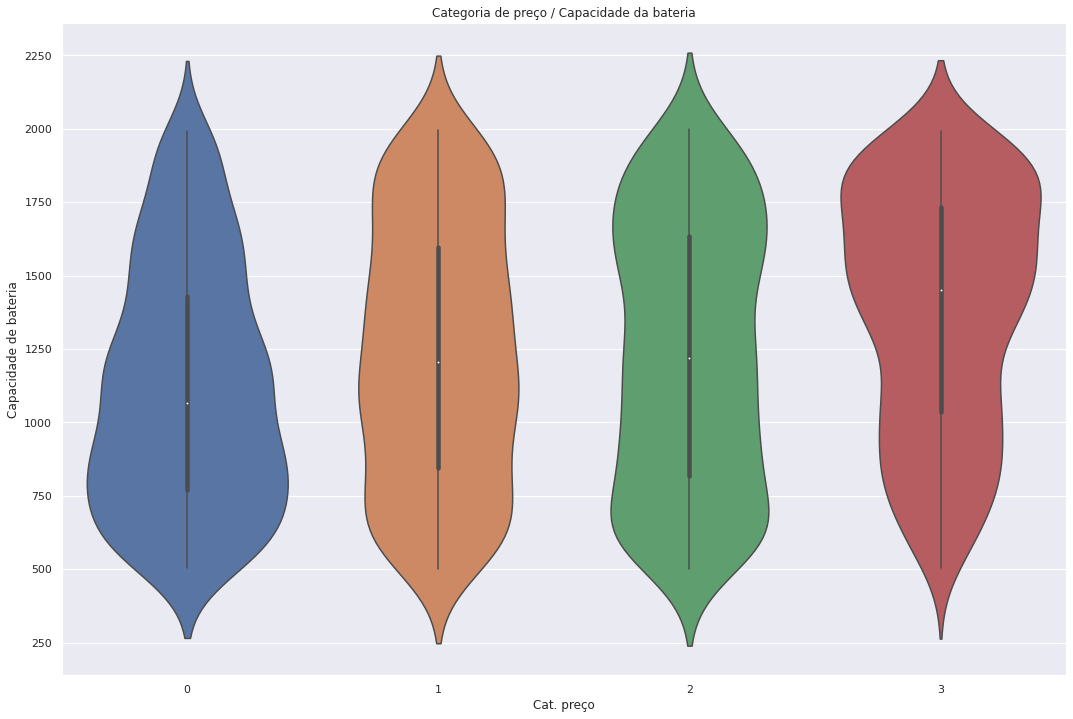

In [ ]:
ax = sns.violinplot(x='price_range',y='battery_power', data = df_train)
ax.set(title ='Categoria de preço / Capacidade da bateria', ylabel='Capacidade de bateria',xlabel='Cat. preço') 
ax

<h1>Observação</h1>

* Os celulares do Grupo 3 apresentam uma diferença significativamente maior em realação a capacidade de bateria dos outros grupos. Já o grupo 0 apresenta uma diferenca significativamente menor. 

* Existe a mesma quantidade de celulares em todos os grupos de preço.

<h1>Peso e Categoria de preço</h1>

In [ ]:
df_train.groupby('price_range')['mobile_wt'].mean()


price_range
0    140.552
1    140.510
2    143.614
3    136.320
Name: mobile_wt, dtype: float64

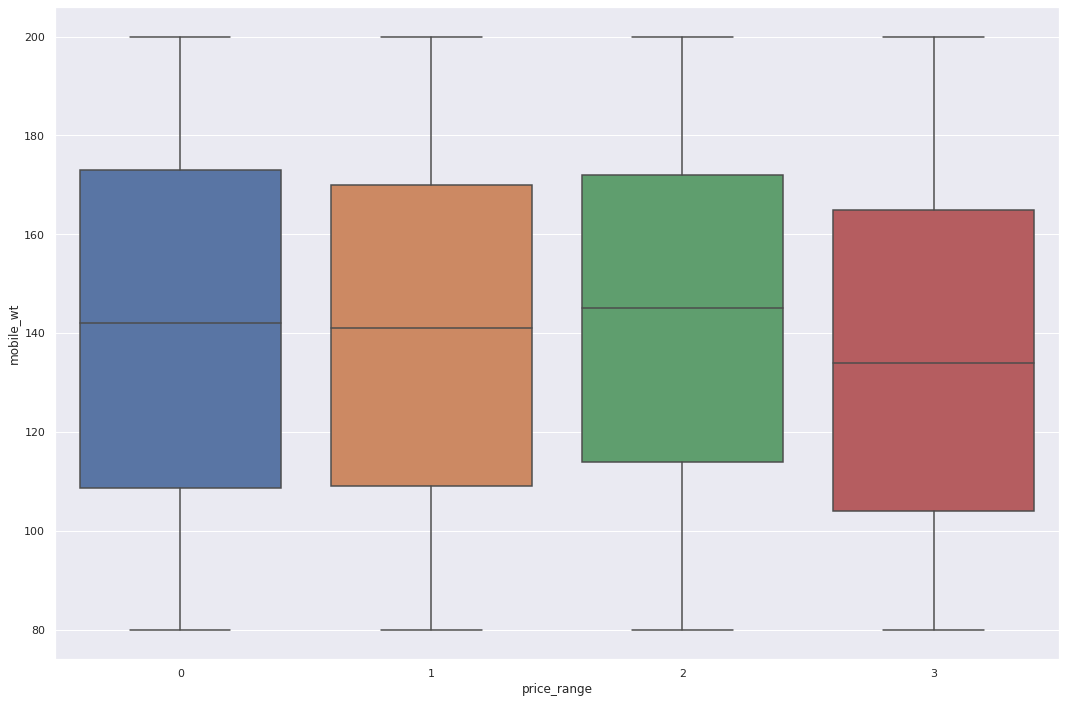

In [ ]:
ax=sns.boxplot(y='mobile_wt',x='price_range', data=df_train)


<h1>Observação:</h1> 

* Aparentemente os celulares do grupo 3 são sgniicativamente mais leves.  

<h1> Numero de nucleos de processadores e Categoria de preço <h2>

In [ ]:
df_train.groupby('n_cores')['n_cores'].count()


n_cores
1    242
2    247
3    246
4    274
5    246
6    230
7    259
8    256
Name: n_cores, dtype: int64

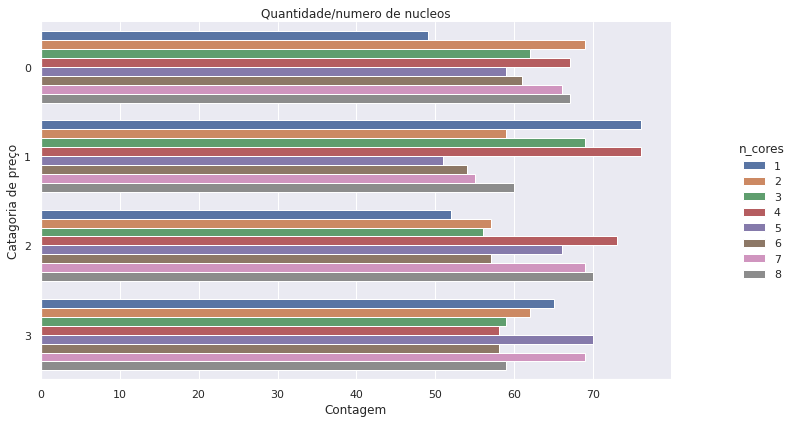

In [ ]:
ax = sns.catplot(y='price_range', data=df_train, hue='n_cores',kind='count')
ax.figure.set_size_inches(12,6) 
ax.set(title ='Quantidade/numero de nucleos', ylabel='Catagoria de preço',xlabel='Contagem') 
ax

<h1> Observação:</h1>

* O grupo de preço 1 aprenta a maior quantidade de 1 e 4 nucleos, porém a menor em 5 nucleos. 

* O grupo 3 apresenta maior quantidade em 7 nucles e 5 nucleos

* O grupo 2 apresenta maior quantidade em8 nucleos

<h1> Pré processamento para os modelos</h1>

In [ ]:
X = df_train.drop(columns=['price_range'])
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,sc_a,px_a
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,63,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,51,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,22,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,128,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,16,1464096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,19,1,1,0,52,2309580
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,16,1,1,1,110,1797975
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,5,1,1,0,9,1416576
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,19,1,1,1,180,225120


In [ ]:
Y = df_train['price_range']
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [ ]:
SEED = 2191

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state = SEED)

print('Comprimento variaveis independentes de treino : {}'.format(len(x_train)))
print('Comprimento das variaveis dependentes de treino: {} '.format(len(y_train)))
print('Comprimento das variavies independentes de teste: {} '.format(len(x_test)))
print('Comprimento das variaveis dependentes de teste: {} '.format(len(y_test)))

Comprimento variaveis independentes de treino : 1400
Comprimento das variaveis dependentes de treino: 1400 
Comprimento das variavies independentes de teste: 600 
Comprimento das variaveis dependentes de teste: 600 


<h1>Modelo 1 - Usando Regressão Lógica</h1>

Apesar de ter no nome a palavra regressão, o LogisticRegression() do sklearn é usado para resolver problemas de classificação.

In [ ]:
modelo_clr = LogisticRegression(random_state=SEED)
modelo_clr = modelo_clr.fit(x_train,y_train)

y_prev_clr = modelo_clr.predict(x_test) 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:

print(classification_report(y_test,y_prev_clr))

              precision    recall  f1-score   support

           0       0.76      0.61      0.67       142
           1       0.40      0.44      0.42       144
           2       0.25      0.26      0.25       148
           3       0.42      0.45      0.44       166

    accuracy                           0.44       600
   macro avg       0.46      0.44      0.45       600
weighted avg       0.45      0.44      0.44       600



In [ ]:
list_param = [ 'l2', 'none']
list_acurracy_clr = []

for p in list_param:
  modelo_clr = LogisticRegression(penalty= p,random_state=SEED)
  modelo_clr = modelo_clr.fit(x_train,y_train)
  acurracy = modelo_clr.score(x_test,y_test)
  list_acurracy_clr.append(acurracy)
 
list_acurracy_clr



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.43666666666666665, 0.435]

In [ ]:
modelo_clr.score(x_test,y_test)

0.435

<h1>Modelo 2 - Usando KNN</h1>

In [ ]:
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn = modelo_knn.fit(x_train,y_train)

y_prev_knn=modelo_knn.predict(x_test)

In [ ]:
print(classification_report(y_test,y_prev_knn))

              precision    recall  f1-score   support

           0       0.40      0.45      0.42       142
           1       0.25      0.31      0.28       144
           2       0.34      0.37      0.35       148
           3       0.33      0.20      0.25       166

    accuracy                           0.33       600
   macro avg       0.33      0.33      0.32       600
weighted avg       0.33      0.33      0.32       600



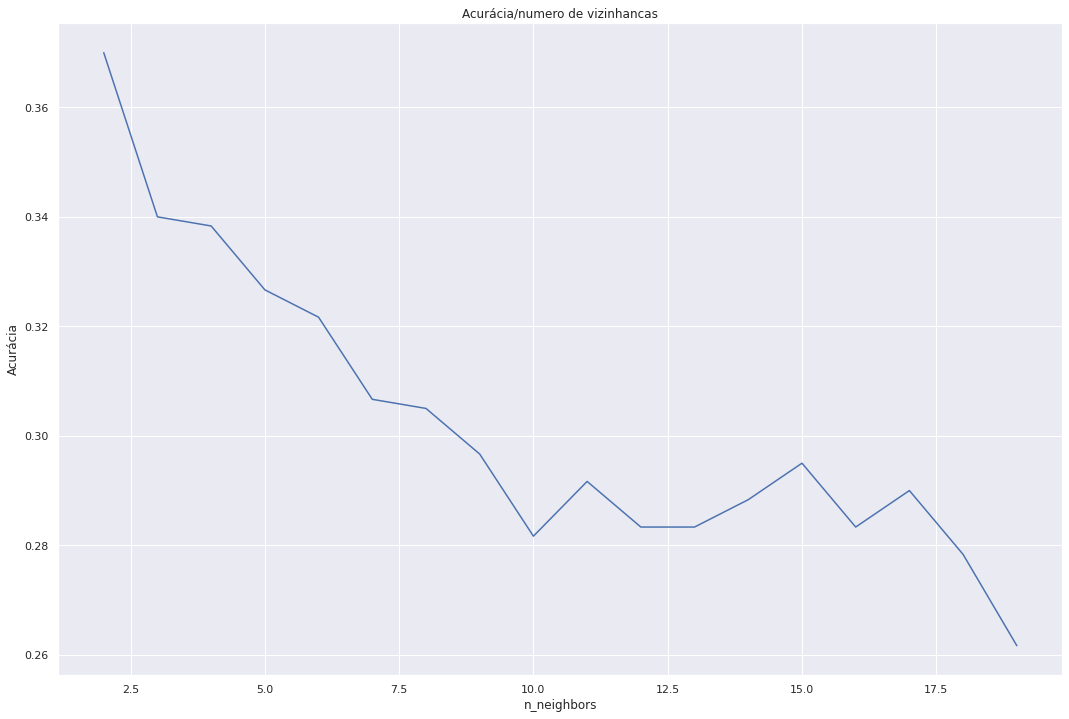

In [ ]:
list_param = range(2,20)
list_acurracy_knn = []

for p in list_param:
  modelo_knn = KNeighborsClassifier(n_neighbors=p)
  modelo_knn = modelo_knn.fit(x_train,y_train)
  acurracy = modelo_knn.score(x_test,y_test)
  list_acurracy_knn.append(acurracy)
 
ax = sns.lineplot(x=list_param, y=list_acurracy_knn) 
ax.set(title ='Acurácia/numero de vizinhancas', ylabel='Acurácia',xlabel='n_neighbors') 
ax

In [ ]:
n_neighbors = np.arange(5,30,step = 5)  
leaf_size = np.arange(10,100,step=10)
p = [1,2,3]
algorithm = ['auto','ball_tree','kd_tree','brute']
weights = ['uniform','distance']

parameters = {
    'n_neighbors':n_neighbors,  
    'leaf_size':leaf_size,
    'p':p,
    'algorithm':algorithm,
    'weights':weights}


knn = GridSearchCV(KNeighborsClassifier(), parameters, cv=3, n_jobs=-1, scoring="accuracy")
knn.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                         'n_neighbors': array([ 5, 10, 15, 20, 25]),
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
pd.DataFrame(knn.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
451,0.004422,0.000432,0.006992,0.000081,ball_tree,70,5,1,distance,"{'algorithm': 'ball_tree', 'leaf_size': 70, 'n...",0.389722,0.372591,0.388412,0.383575,0.007785,1
151,0.003443,0.000016,0.028930,0.001193,auto,60,5,1,distance,"{'algorithm': 'auto', 'leaf_size': 60, 'n_neig...",0.389722,0.372591,0.388412,0.383575,0.007785,1
871,0.004730,0.001829,0.027944,0.000404,brute,30,5,1,distance,"{'algorithm': 'brute', 'leaf_size': 30, 'n_nei...",0.389722,0.372591,0.388412,0.383575,0.007785,1
721,0.011796,0.004938,0.017038,0.004452,kd_tree,70,5,1,distance,"{'algorithm': 'kd_tree', 'leaf_size': 70, 'n_n...",0.389722,0.372591,0.388412,0.383575,0.007785,1
661,0.013004,0.000074,0.016602,0.001386,kd_tree,50,5,1,distance,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_n...",0.389722,0.372591,0.388412,0.383575,0.007785,1


In [ ]:
best_params_knn = knn.best_params_
best_params_knn

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [ ]:
modelo_knn_best = KNeighborsClassifier(**best_params_knn)
modelo_knn_best = modelo_knn_best.fit(x_train,y_train)

y_prev_knn = modelo_knn_best.predict(x_test)

In [ ]:
print(classification_report(y_test,y_prev_knn))

              precision    recall  f1-score   support

           0       0.55      0.48      0.51       142
           1       0.36      0.38      0.36       144
           2       0.35      0.44      0.39       148
           3       0.46      0.38      0.42       166

    accuracy                           0.42       600
   macro avg       0.43      0.42      0.42       600
weighted avg       0.43      0.42      0.42       600



<h1>Modelo 3 - Usando o DecisionTree</h1>

In [ ]:
modelo_dtc = DecisionTreeClassifier(random_state=SEED)
modelo_dtc = modelo_dtc.fit(x_train,y_train)

y_prev_dct = modelo_dtc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_prev_dct))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       142
           1       0.80      0.79      0.80       144
           2       0.79      0.73      0.76       148
           3       0.86      0.92      0.89       166

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



In [ ]:

criterion = ["gini", "entropy","log_loss"]  
splitter = ['best','random']
max_depth = np.arange(2, 10, step = 2)
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [2, 4]


parameters = {
    "criterion": criterion,
    "splitter": splitter,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf
}


dtc = GridSearchCV(DecisionTreeClassifier(random_state=SEED), parameters, cv=3, n_jobs=-1, scoring="accuracy")
dtc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
192 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
192 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2191),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([2, 4, 6, 8]),
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': array([2, 4, 6, 8]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
pd.DataFrame(dtc.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
116,0.015790,0.000085,0.003080,0.000095,entropy,8,2,6,best,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.860814,0.835118,0.854077,0.850003,0.010879,1
118,0.021321,0.005368,0.007215,0.005079,entropy,8,2,8,best,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.843683,0.843683,0.854077,0.847148,0.004900,2
120,0.019929,0.006542,0.003085,0.000124,entropy,8,4,2,best,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.826552,0.850107,0.845494,0.840718,0.010192,3
126,0.017653,0.003040,0.003263,0.000315,entropy,8,4,8,best,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.826552,0.850107,0.845494,0.840718,0.010192,3
122,0.030749,0.003243,0.005823,0.003329,entropy,8,4,4,best,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.826552,0.850107,0.845494,0.840718,0.010192,3


In [ ]:
best_params_dct = dtc.best_params_
best_params_dct

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'splitter': 'best'}

In [ ]:
modelo_dct_best = DecisionTreeClassifier(**best_params_dct, random_state=SEED)
modelo_dct_best = modelo_dct_best.fit(x_train,y_train)

y_prev_dct = modelo_dct_best.predict(x_test)

In [ ]:
print(classification_report(y_test,y_prev_dct))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       142
           1       0.84      0.86      0.85       144
           2       0.76      0.76      0.76       148
           3       0.89      0.87      0.88       166

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



<h1> Modelo 4 - Usando Linear SVC</h1>

In [ ]:
modelo_svc = LinearSVC(random_state=SEED)
modelo_svc = modelo_svc.fit(x_train,y_train)

y_prev_svc = modelo_svc.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
print(classification_report(y_test,y_prev_svc))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       142
           1       0.32      0.08      0.12       144
           2       0.60      0.02      0.04       148
           3       0.40      0.99      0.57       166

    accuracy                           0.46       600
   macro avg       0.50      0.45      0.35       600
weighted avg       0.49      0.46      0.36       600



<h1>Modelo 5 - Usando o RandomForestClassifier</h1>





In [ ]:
modelo_rfc = RandomForestClassifier(random_state=SEED)
modelo_rfc = modelo_rfc.fit(x_train,y_train)

y_prev_rfc = modelo_rfc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_prev_rfc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       142
           1       0.87      0.85      0.86       144
           2       0.80      0.80      0.80       148
           3       0.92      0.91      0.92       166

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



In [ ]:
n_estimators = np.arange(100, 200, step=20)	
criterion = ["gini", "entropy"]  
max_depth = list(np.arange(2, 10, step=2))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [2, 4]
bootstrap = [True, False]

parameters = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}


modelo_rfc = GridSearchCV(RandomForestClassifier(random_state=SEED), parameters, cv=3, n_jobs=-1, scoring="accuracy")
modelo_rfc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2191),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [2, 4],
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([100, 120, 140, 160, 180])},
             scoring='accuracy')

In [ ]:
pd.DataFrame(modelo_rfc.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
293,0.795040,0.017110,0.046815,0.001955,True,entropy,8,2,6,160,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.877944,0.850107,0.869099,0.865717,0.011613,1
291,0.607290,0.012913,0.036250,0.000544,True,entropy,8,2,6,120,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.877944,0.841542,0.873391,0.864292,0.016194,2
292,0.703284,0.001368,0.041226,0.000780,True,entropy,8,2,6,140,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.871520,0.845824,0.873391,0.863578,0.012577,3
290,0.504130,0.005580,0.029699,0.000152,True,entropy,8,2,6,100,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.875803,0.835118,0.877682,0.862868,0.019637,4
294,0.908583,0.003690,0.050963,0.000095,True,entropy,8,2,6,180,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.875803,0.841542,0.871245,0.862863,0.015191,5


In [ ]:
best_param_rfc = modelo_rfc.best_params_
best_param_rfc

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 160}

In [ ]:

modelo_rfc_best = RandomForestClassifier(**best_param_rfc, random_state=SEED)
modelo_rfc_best = modelo_rfc_best.fit(x_train,y_train)

y_prev_rfc = modelo_rfc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_prev_rfc))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       142
           1       0.85      0.83      0.84       144
           2       0.81      0.81      0.81       148
           3       0.94      0.93      0.93       166

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



<h1>Modelo 6 - Usando o AdaBoostClassifier</h1>

In [ ]:
modelo_abc = AdaBoostClassifier(random_state=SEED)
modelo_abc = modelo_abc.fit(x_train,y_train)

y_prev_abc = modelo_abc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_prev_abc))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67       142
           1       0.54      0.90      0.67       144
           2       0.47      0.67      0.55       148
           3       0.90      0.38      0.53       166

    accuracy                           0.61       600
   macro avg       0.71      0.62      0.61       600
weighted avg       0.72      0.61      0.60       600



<h1>Modelo 7 - BaggingClassifier</h1>


In [ ]:
modelo_bgc = BaggingClassifier(random_state=SEED)
modelo_bgc = modelo_bgc.fit(x_train,y_train)

y_prev_bgc = modelo_bgc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_prev_bgc))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       142
           1       0.84      0.89      0.86       144
           2       0.82      0.74      0.78       148
           3       0.89      0.90      0.90       166

    accuracy                           0.88       600
   macro avg       0.87      0.88      0.87       600
weighted avg       0.87      0.88      0.87       600



In [ ]:
n_estimators = np.arange(10, 100, step=20)	
max_samples = np.arange(10,100, step=20) 
max_features = np.arange(10,100, step=20)
bootstrap = [True, False]

parameters = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_samples": max_sample,
    "bootstrap": bootstrap,
}


bgc = GridSearchCV(BaggingClassifier(random_state=SEED), parameters, cv=3, n_jobs=-1, scoring="accuracy")
bgc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 342, in _fit
    raise ValueError("max_features must be in (0, 

GridSearchCV(cv=3, estimator=BaggingClassifier(random_state=2191), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': array([10, 30, 50, 70, 90]),
                         'max_samples': array([10, 30, 50, 70, 90]),
                         'n_estimators': array([10, 30, 50, 70, 90])},
             scoring='accuracy')

In [ ]:
pd.DataFrame(bgc.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
148,0.206846,0.001624,0.023025,0.000130,False,10,90,70,"{'bootstrap': False, 'max_features': 10, 'max_...",0.785867,0.792291,0.800429,0.792863,0.005959,1
147,0.152214,0.003150,0.018129,0.000665,False,10,90,50,"{'bootstrap': False, 'max_features': 10, 'max_...",0.798715,0.783726,0.796137,0.792859,0.006544,2
21,0.098693,0.008306,0.011910,0.000107,True,10,90,30,"{'bootstrap': True, 'max_features': 10, 'max_s...",0.805139,0.800857,0.772532,0.792843,0.014468,3
22,0.151179,0.001713,0.018170,0.000933,True,10,90,50,"{'bootstrap': True, 'max_features': 10, 'max_s...",0.788009,0.788009,0.800429,0.792149,0.005855,4
24,0.299152,0.014815,0.037355,0.012583,True,10,90,90,"{'bootstrap': True, 'max_features': 10, 'max_s...",0.790150,0.785867,0.796137,0.790718,0.004212,5


In [ ]:
best_param_bgc = bgc.best_params_
best_param_bgc

{'bootstrap': False, 'max_features': 10, 'max_samples': 90, 'n_estimators': 70}

In [ ]:
modelo_bgc_best = BaggingClassifier(**best_param_bgc, random_state=SEED)
modelo_bgc_best = modelo_bgc_best.fit(x_train,y_train)

y_prev_bgc = modelo_rfc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_prev_bgc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       142
           1       0.85      0.83      0.84       144
           2       0.81      0.81      0.81       148
           3       0.94      0.93      0.93       166

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



<h1> Modelo 8 - Usando o GaussianNB</h1>

In [ ]:

modelo_gnb = GaussianNB()
modelo_gnb = modelo_gnb.fit(x_train,y_train)

y_prev_gnb = modelo_gnb.predict(x_test)

In [ ]:
print(classification_report(y_test,y_prev_gnb))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       142
           1       0.75      0.72      0.73       144
           2       0.69      0.72      0.71       148
           3       0.90      0.89      0.90       166

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



<h1>Escolhendo melhores modelos</h1>

* Dentre os 8 modelos escolhido, os com melhores acuracia foram: GaussianNB (82%), BaggingClassifier (88%) e RandomForestClassifier (89%)


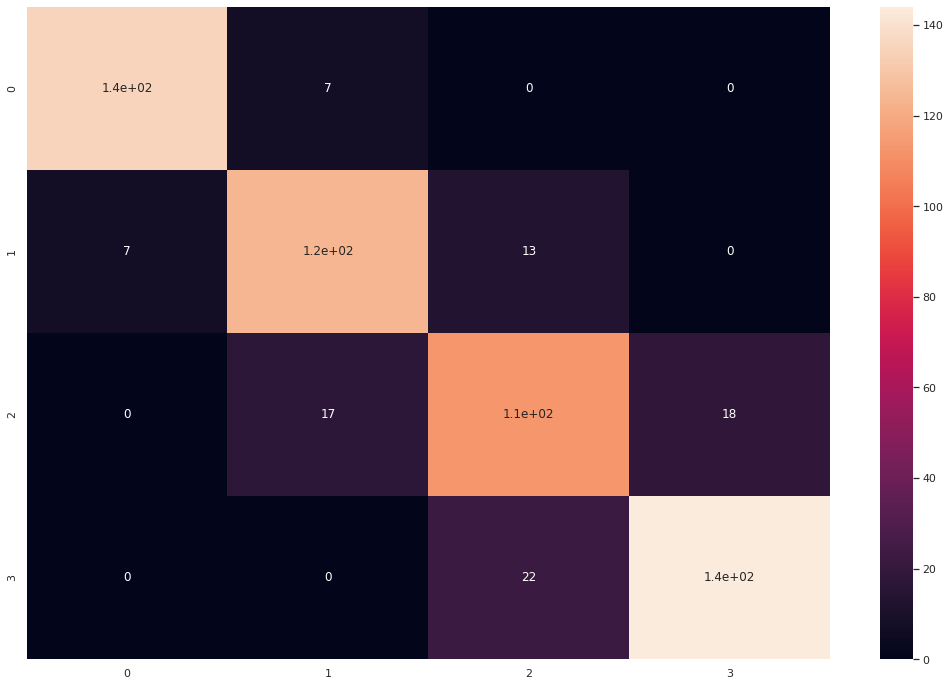

In [ ]:
matrix_rfc = confusion_matrix(y_test,y_prev_rfc)
ax = sns.heatmap(matrix_rfc,annot = True)

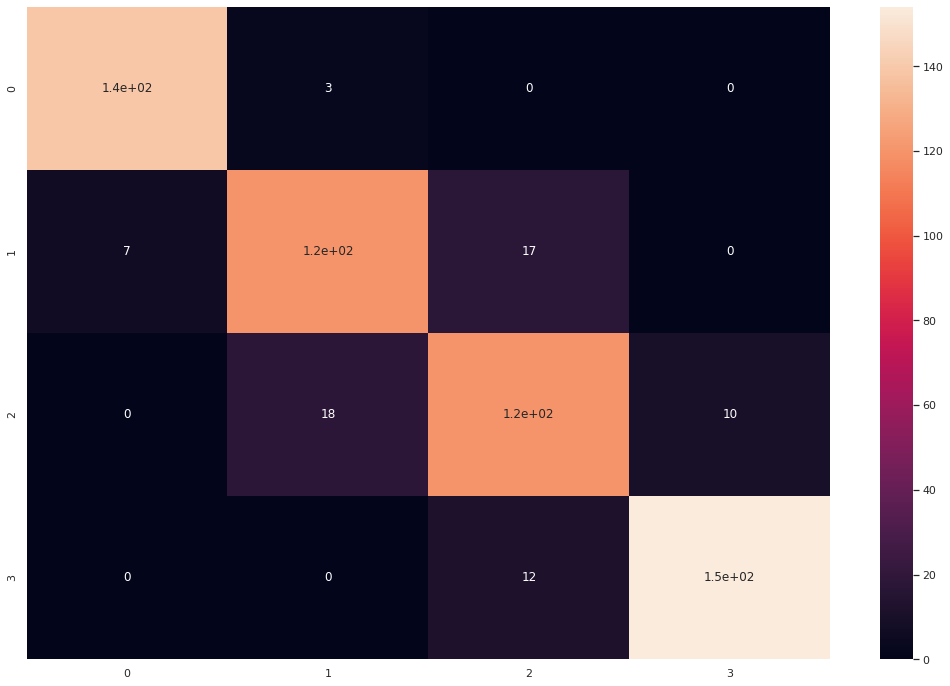

In [ ]:
matrix_bgc = confusion_matrix(y_test,y_prev_bgc)
ax = sns.heatmap(matrix_bgc,annot = True)

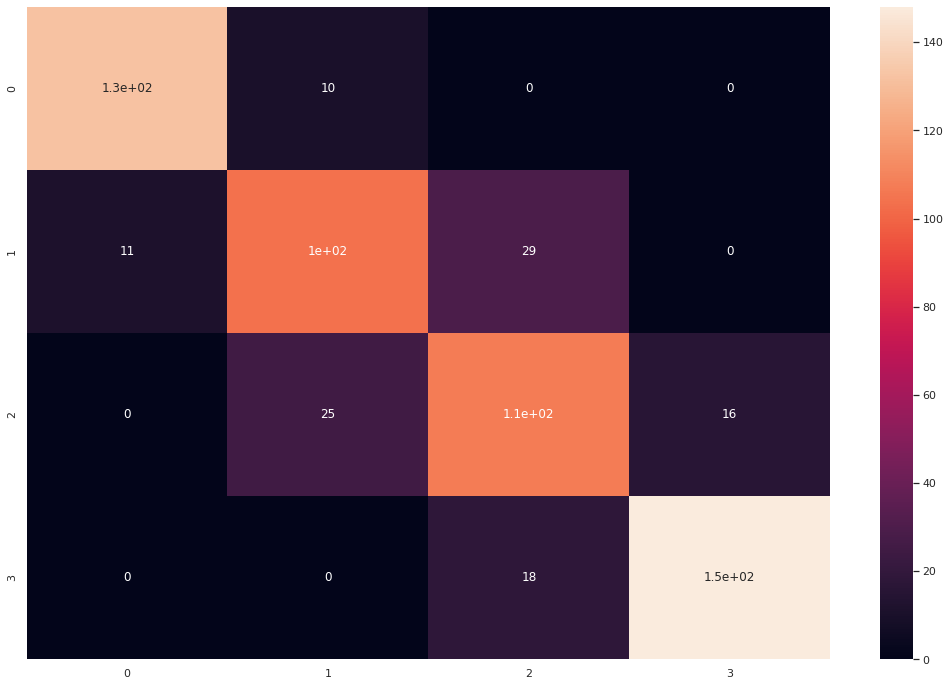

In [ ]:
matrix_gnb = confusion_matrix(y_test,y_prev_gnb)
ax = sns.heatmap(matrix_gnb,annot = True)

<h1>Observação:</h1>

* Dos 3 modelos, o GaussiaNB foi o que apresentou maior numero de classificações de preço errado.

* O randomForestClassifier perfoma melhor

<h1> Rotulando o test.csv com Modelo RandomForestClassifier </h1>

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.drop(columns='id', inplace=True)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [ ]:
df_test['px_a'] = df_test['px_width']*df_test['px_height']
df_test.drop(columns=['px_width','px_height'],inplace=True)
df_test['sc_a'] = df_test['sc_h']*df_test['sc_w']
df_test.drop(columns=['sc_h','sc_w'],inplace=True)
df_test


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,px_a,sc_a
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,3476,2,0,1,0,319112,84
1,841,1,0.5,1,4,1,61,0.8,191,5,12,3895,7,1,0,0,639322,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,2396,10,0,1,1,1734820,170
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,3893,7,1,1,0,516840,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,1773,7,1,0,1,606690,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,2121,15,1,1,0,587972,112
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1933,19,0,1,1,1880064,8
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,1223,14,1,0,0,393525,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,2509,6,0,1,0,31616,165


In [ ]:
y_prev_best = modelo_rfc_best.predict(df_test)
y_prev_best

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([3, 3, 2, 3, 1, 3, 3, 0, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 0, 3, 1, 2, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 3, 1, 3, 1, 0, 3, 3, 3, 0, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 2, 1, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 2, 1, 0, 1,
       1, 1, 2, 0, 2, 0, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 2, 0, 0, 0, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 0, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 1, 2, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 2, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

In [ ]:
df_test['price_range_predict'] = y_prev_best
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,px_a,sc_a,price_range_predict
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,3476,2,0,1,0,319112,84,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,3895,7,1,0,0,639322,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,2396,10,0,1,1,1734820,170,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,3893,7,1,1,0,516840,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,1773,7,1,0,1,606690,120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,2121,15,1,1,0,587972,112,2
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1933,19,0,1,1,1880064,8,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,1223,14,1,0,0,393525,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,2509,6,0,1,0,31616,165,2


In [ ]:
df_test.to_csv('test_predict.csv', index = False)

<h1> Colabore com está analise deixando sua opinuão nos comentarios   =)</h1>

Linkedin: https://www.linkedin.com/in/guilherme-irigon-22a1a458/

github: https://github.com/Siri2191

instagram: @guilhermeirigon